In [1]:
import pandas as pd
import numpy as np
import random
from rdkit import Chem
from snn_model import get_loss_fn
import torch

from snntorch import spikegen, surrogate
import matplotlib.pyplot as plt
from utils import load_dataset_df



No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
No normalization for NumAmideBonds. Feature removed!
No normalization for NumAtomStereoCenters. Feature removed!
No normalization for NumBridgeheadAtoms. Feature removed!
No normalization for NumHeterocycles. Feature removed!
No normalization for NumSpiroAtoms. Feature removed!
No normalization for NumUnspecifiedAtomStereoCenters. Feature removed!
No normalization for Phi. Feature removed!
Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (c:\Users\knsve\Desktop\MEI\Tese\torch\snn_venv\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-geometri

In [2]:
files = ['tox21.csv','sider.csv', 'BBBP.csv']
dt_file = files[0]
dirname = dt_file.removesuffix('.csv')

df, targets = load_dataset_df(filename=dt_file)

for t in targets:
    df_temp = df[[t, 'smiles']].dropna()
    class_counts = df[t].count()
    class_sum = df[t].sum()
    print(t, class_counts, class_sum) 

NR-AR 7265 309.0
NR-AR-LBD 6758 237.0
NR-AhR 6549 768.0
NR-Aromatase 5821 300.0
NR-ER 6193 793.0
NR-ER-LBD 6955 350.0
NR-PPAR-gamma 6450 186.0
SR-ARE 5832 942.0
SR-ATAD5 7072 264.0
SR-HSE 6467 372.0
SR-MMP 5810 918.0
SR-p53 6774 423.0


In [3]:
a = torch.Tensor([1, 1, 1, 0, 0, 0, 0])
spikegen.rate(a, num_steps=10, gain=0.25)

tensor([[0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.]])

[-0.48394826  0.40976858 -0.08125141]
[ 0.3910572  -0.21452698  0.04267704]
[0.02938306 0.2954033  0.32101774]
[-0.49875915  0.10855156  0.35123122]
[-0.29602653 -0.56115174  0.54587054]
[ 0.20654827 -0.22573048 -0.24565059]
[-0.42360315 -0.36520636  0.45500278]
[-0.48147053  0.2937438   0.34024042]


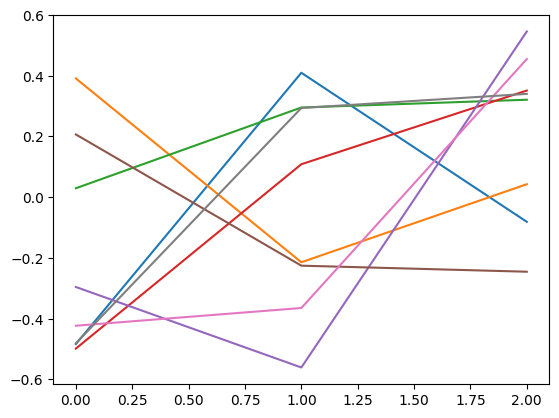

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define a Conv1D layer
conv1d = nn.Conv1d(in_channels=1, out_channels=8, kernel_size=3, dilation=2)

# Get the weights (kernels)
kernels = conv1d.weight.detach().cpu().numpy()  # Shape: (out_channels, in_channels, kernel_size)

# Plot the kernels
for i, kernel in enumerate(kernels):

    print(kernel[0])
    plt.plot(kernel[0], label=f'Filter {i}')
    

In [5]:
import snntorch as snn
neuron = snn.Leaky(beta=0.95)
print(neuron.threshold)

tensor(1.)


In [6]:
""" from rdkit import Chem
from rdkit.Chem import Descriptors

smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
mol = Chem.MolFromSmiles(smiles)

# Get all available descriptors dynamically
all_descriptors = {name: func(mol) 
                   for name, func in Descriptors.__dict__.items() 
                   if callable(func) and not name.startswith("__")}

print(all_descriptors) """

' from rdkit import Chem\nfrom rdkit.Chem import Descriptors\n\nsmiles = "CC(=O)OC1=CC=CC=C1C(=O)O"\nmol = Chem.MolFromSmiles(smiles)\n\n# Get all available descriptors dynamically\nall_descriptors = {name: func(mol) \n                   for name, func in Descriptors.__dict__.items() \n                   if callable(func) and not name.startswith("__")}\n\nprint(all_descriptors) '

# CONV1D HAS A BIAS PARAMETER -> A SEQUENCE OF ZEROS CAN PRODUCE SYNAPTIC INPUT FOR THE LIF NEURON

initial threshold: 1.0
mem: [0.0, -0.14693915843963623, -0.590795636177063, -0.4979272484779358, -0.4730308949947357, -0.4493793547153473, -0.4269103705883026, -0.4055648446083069, -0.3852865993976593, -0.3660222589969635, -0.347721129655838, -0.3303350806236267, -0.4607574939727783, -0.8889230489730835, -0.7811482548713684, -0.7420908212661743, -0.7049862742424011, -0.6697369813919067, -0.6362501382827759, -0.7513768076896667, -1.1650114059448242, -1.0434322357177734, -0.9912605881690979, -0.9416975378990173, -0.8946126699447632, -0.8498820066452026, -0.8073878884315491, -0.7670184969902039, -0.7286675572395325, -0.6922341585159302, -0.6576224565505981, -0.771680474281311, -1.1842998266220093, -1.0617562532424927, -1.0086684226989746, -0.958234965801239, -0.9103232026100159, -0.8648070096969604, -0.821566641330719, -0.9274274706840515, -1.3322594165802002, -1.2023178339004517, -1.1422019004821777, -1.0850918292999268, -1.0308371782302856, -0.9792953133583069, -0.9303305149078369, -0.8

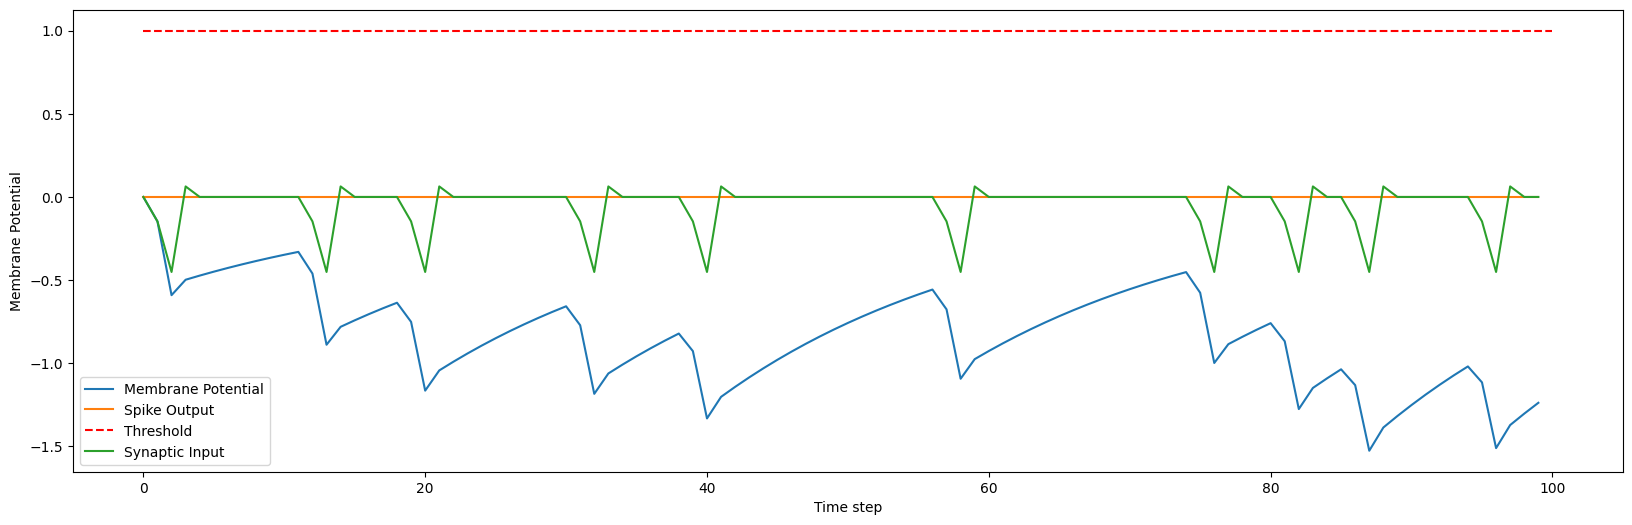

In [169]:
import torch
import torch.nn as nn
import snntorch as snn
import matplotlib.pyplot as plt

beta = 0.95
time_steps = 100
num_spikes = int(time_steps * 0.1)
spike_train = torch.zeros((1, 1, time_steps))
spike_times = random.sample(range(time_steps), num_spikes)
spike_train[0, 0, spike_times] = 1


conv1d = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=1, bias=False)


conv_output = conv1d(spike_train)

lif = snn.Leaky(beta=beta)#, learn_threshold=True)
lif.reset_mem()


mem = torch.zeros(1)  # Initial membrane potential
mem_trace = []
spk_trace = []
thresholds = [lif.threshold.item()]
print("initial threshold:", lif.threshold.item())
for t in range(conv_output.shape[-1]):
    #print("mem:", mem.item())
    #print(conv_output[0, 0, t])
    spk, mem = lif(conv_output[0, 0, t], mem)
    #print(f"mem after input {conv_output[0, 0, t]:2.3f}:", mem.item())
    mem_trace.append(mem.item())
    spk_trace.append(spk.item())
    thresholds.append(lif.threshold.detach().item())
#print(conv_output[0, 0, :].tolist())
print("mem:",mem_trace)
print("spk:",spk_trace)
print("thr:",thresholds)
#print("syn:",conv_output[0, 0, :].detach().numpy())
#--------------------------------------------------
# Plot membrane potential over time
plt.figure(figsize=(20, 6))
plt.plot(mem_trace, label="Membrane Potential")
plt.plot(spk_trace, label="Spike Output")
plt.plot(thresholds, color='r', linestyle='--', label="Threshold")
plt.plot(conv_output[0, 0, :].detach().numpy(), label="Synaptic Input")
plt.xlabel("Time step")
plt.ylabel("Membrane Potential")
plt.legend()
plt.show()
